In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the IMDB-WIKI dataset

Get the image metadata here: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

Get the pairwise comparison data here: https://github.com/Toloka/IMDB-WIKI-SbS

In [3]:
# Load MATLAB files
wiki = scipy.io.loadmat('./data/imdb-wiki/wiki.mat')
imdb = scipy.io.loadmat('./data/imdb-wiki/imdb.mat')
wiki

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

In [4]:
# Extract people's names and photos taken
names_wiki = wiki['wiki']['name'][0][0][0]
names_imdb = imdb['imdb']['name'][0][0][0]
photo_taken_wiki = wiki['wiki']['photo_taken'][0][0][0]
photo_taken_imdb = imdb['imdb']['photo_taken'][0][0][0]
names_wiki = np.array([names[0] if len(names)>0 else '' for names in names_wiki])
names_imdb = np.array([names[0] if len(names)>0 else '' for names in names_imdb])
names_wiki

array(['Sami Jauhojärvi', 'Dettmar Cramer', 'Marc Okrand', ...,
       'Michael Wiesinger', 'Johann Grugger', 'Greta Van Susteren'],
      dtype='<U70')

In [5]:
# Extract file paths
full_path_wiki = wiki['wiki']['full_path'][0][0][0]
full_path_imdb = imdb['imdb']['full_path'][0][0][0]
full_path_wiki

array([array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
       array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
       array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
       array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
       array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
       array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')],
      dtype=object)

In [180]:
for i, entry in enumerate(full_path_imdb):
    if entry[0].split('/')[1] == 'nm0000323_rm3114703104_1933-3-14_2003.jpg':
        print(i, entry)

46309 ['23/nm0000323_rm3114703104_1933-3-14_2003.jpg']


In [37]:
# Only keep the file names
filename_wiki = np.array(list(map(lambda x:x.split('/')[1], np.stack(full_path_wiki).flatten())))
filename_imdb = np.array(list(map(lambda x:x.split('/')[1], np.stack(full_path_imdb).flatten())))
filename_wiki

array(['10000217_1981-05-05_2009.jpg', '10000548_1925-04-04_1964.jpg',
       '100012_1948-07-03_2008.jpg', ..., '9998109_1972-12-27_2013.jpg',
       '9999400_1981-12-13_2011.jpg', '999980_1954-06-11_2008.jpg'],
      dtype='<U34')

In [11]:
# Get the genders
gender_wiki = wiki['wiki']['gender'][0][0][0]
gender_imdb = imdb['imdb']['gender'][0][0][0]
gender_imdb

array([1., 1., 1., ..., 0., 0., 0.])

In [113]:
# Convert to DataFrames and concat
imdb_df = pd.DataFrame({'filename': filename_imdb, 'gender': gender_imdb, 'name': names_imdb, 'photo taken': photo_taken_imdb, 'dataset':'imdb'})
wiki_df = pd.DataFrame({'filename': filename_wiki, 'gender': gender_wiki, 'name': names_wiki, 'photo taken': photo_taken_wiki, 'dataset':'wiki'})
gender_df = pd.concat([imdb_df, wiki_df]).reset_index(drop=True)
gender_df

,filename,gender,name,photo taken,dataset
0,nm0000001_rm124825600_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
1,nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0,Fred Astaire,1970,imdb
2,nm0000001_rm577153792_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
3,nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
4,nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,1968,imdb
...,...,...,...,...,...
523046,9996949_1937-04-17_1963.jpg,1.0,Guus Haak,1963,wiki
523047,9997032_1947-07-30_1970.jpg,1.0,Nico Rijnders,1970,wiki
523048,9998109_1972-12-27_2013.jpg,1.0,Michael Wiesinger,2013,wiki
523049,9999400_1981-12-13_2011.jpg,1.0,Johann Grugger,2011,wiki


In [105]:
# Get the ground-truth ages
gt_df = pd.read_csv('./data/imdb-wiki/gt.csv')
gt_df['filename'] = gt_df['label'].apply(lambda x: x.split('/')[-1])
gt_df = gt_df.rename({'score': 'age'}, axis=1)
gt_df

,label,age,filename
0,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm1442940_rm3965098752_1996-10-3_2006.jpg
1,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm4832920_rm1781768448_2003-8-28_2013.jpg
2,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm0652089_rm860657920_1992-3-10_2002.jpg
3,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm0004917_rm1493730304_1969-5-12_1979.jpg
4,https://tlk.s3.yandex.net/annotation_tasks/IMD...,10,nm1113550_rm1332711936_1996-4-14_2006.jpg
...,...,...,...
9145,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,475367_1941-08-03_2011.jpg
9146,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,304085_1919-07-07_1989.jpg
9147,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,nm0001627_rm4164078592_1927-2-20_1997.jpg
9148,https://tlk.s3.yandex.net/annotation_tasks/IMD...,70,nm0000024_rm1715129344_1904-4-14_1974.jpg


In [114]:
# merge ground-truth on on 'filename' column
df = pd.merge(gt_df[['age', 'filename']], gender_df[['filename', 'gender', 'name', 'photo taken', 'dataset']], on='filename', how='left')
df['gender'] = df['gender'].astype(int)
df

,age,filename,gender,name,photo taken,dataset
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb
...,...,...,...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki
9146,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb


In [ ]:
# Import the pairwise comparisons
pairwise_df = pd.read_csv('./data/imdb-wiki/crowd_labels.csv')
pairwise_df['left']  = pairwise_df['left'].apply(lambda x: x.split('/')[-1])
pairwise_df['right'] = pairwise_df['right'].apply(lambda x: x.split('/')[-1])
pairwise_df['label'] = pairwise_df['label'].apply(lambda x: x.split('/')[-1])
pairwise_df

,left,right,label,performer
0,26147732_1991-07-22_2015.jpg,nm0707728_rm4048061440_1935-1-2_1966.jpg,nm0707728_rm4048061440_1935-1-2_1966.jpg,0
1,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,nm0000072_rm2497944320_1932-2-27_1985.jpg,0
2,nm0788370_rm2989144320_1971-4-11_1999.jpg,nm0726180_rm2487589632_1981-1-1_2005.jpg,nm0788370_rm2989144320_1971-4-11_1999.jpg,0
3,nm0325390_rm3409478912_1951-10-19_1979.jpg,1094676_1944-12-08_2011.jpg,1094676_1944-12-08_2011.jpg,1
4,1780768_1927-01-22_1963.jpg,nm0000442_rm1571854336_1944-1-23_2005.jpg,nm0000442_rm1571854336_1944-1-23_2005.jpg,1
...,...,...,...,...
250244,nm0000943_rm2478151680_1968-1-13_1999.jpg,nm0000825_rm1298385920_1952-10-7_1962.jpg,nm0000825_rm1298385920_1952-10-7_1962.jpg,3885
250245,26835279_1938-12-27_2004.jpg,nm0771493_rm519611392_1955-5-27_2013.jpg,26835279_1938-12-27_2004.jpg,3885
250246,2723_1964-05-27_2007.jpg,nm0858969_rm53517056_1990-1-30_2001.jpg,2723_1964-05-27_2007.jpg,4090
250247,nm0177396_rm3601370112_1987-9-15_2010.jpg,nm0005391_rm3942707712_1963-3-10_2015.jpg,nm0005391_rm3942707712_1963-3-10_2015.jpg,4090


In [ ]:
# replace the values in df2 with their corresponding index in df1
pairwise_df['left']  = pairwise_df['left'].apply(lambda x:  df[df['filename']==x].index[0])
pairwise_df['right'] = pairwise_df['right'].apply(lambda x: df[df['filename']==x].index[0])
pairwise_df['label'] = pairwise_df['label'].apply(lambda x: df[df['filename']==x].index[0])
pairwise_df

In [115]:
pairwise_df.to_csv('./data/imdb-wiki/comparisons_cleaned.csv', index=False)
df.to_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index=True)

## Additional annotations

### DeepFace

In [ ]:
gt_df['label'].to_csv('./data/imdb-wiki/gt_image_urls.csv', index=False, header=False)

…download the pictures with wget…

…annotate the pictures with DeepFace (GPU + batch processing enabled) …

In [116]:
stats_df = pd.DataFrame()
for i in range(92):
    tmp_df = pd.read_csv(f'./data/annotated_results_SbS_dataset/annotated_pictures_{i*100}.csv')
    stats_df = pd.concat([stats_df, tmp_df])
stats_df.reset_index(drop=True, inplace=True)
stats_df['filename'] = stats_df['img_path'].apply(lambda x: x.split('/')[-1])
stats_df['gender'] = stats_df[['Woman', 'Man']].idxmax(axis='columns')
stats_df['race'] = stats_df[['asian', 'indian', 'black', 'white', 'middle eastern', 'latino hispanic']].idxmax(axis='columns')
stats_df['age'] = stats_df[[str(i) for i in range(101)]].idxmax(axis='columns')
stats_df.head(5)

,img_path,img_region,confidence,Woman,Man,asian,indian,black,white,middle eastern,...,95,96,97,98,99,100,filename,gender,race,age
0,./data/pairwise_pictures/nm1442940_rm396509875...,"{'x': 37, 'y': 32, 'w': 68, 'h': 68}",8.944261,0.999998,1.992258e-06,6.712709e-08,2.154894e-08,2.317176e-11,9.994391e-01,3.144174e-04,...,2.318437e-26,1.537810e-25,2.298066e-22,4.601678e-18,1.058574e-20,1.177248e-22,nm1442940_rm3965098752_1996-10-3_2006.jpg,Woman,white,29
1,./data/pairwise_pictures/nm4832920_rm178176844...,"{'x': 130, 'y': 93, 'w': 267, 'h': 267}",7.807059,0.006351,9.936494e-01,1.131575e-13,3.097121e-10,1.000000e+00,9.185442e-17,1.897939e-18,...,5.070282e-20,7.929017e-19,1.474251e-16,2.811107e-14,1.228854e-16,1.221402e-20,nm4832920_rm1781768448_2003-8-28_2013.jpg,Man,black,20
2,./data/pairwise_pictures/nm0652089_rm860657920...,"{'x': 21, 'y': 23, 'w': 87, 'h': 87}",6.805956,0.016207,9.837928e-01,4.315005e-01,3.876365e-02,6.103022e-02,2.562613e-01,7.980810e-02,...,6.775297e-17,2.326861e-16,1.465573e-15,6.480504e-13,1.292861e-14,1.903800e-16,nm0652089_rm860657920_1992-3-10_2002.jpg,Man,asian,21
3,./data/pairwise_pictures/nm0004917_rm149373030...,"{'x': 130, 'y': 94, 'w': 275, 'h': 275}",7.320765,0.998937,1.063530e-03,3.227220e-01,1.179479e-01,7.288104e-02,1.708888e-01,1.238024e-01,...,3.020715e-31,6.157650e-28,3.364378e-24,5.999658e-19,3.861670e-22,8.914971e-21,nm0004917_rm1493730304_1969-5-12_1979.jpg,Woman,asian,36
4,./data/pairwise_pictures/nm1113550_rm133271193...,"{'x': 54, 'y': 47, 'w': 112, 'h': 112}",10.668577,0.999999,6.452609e-07,2.400677e-03,2.659190e-03,1.000963e-04,7.371253e-01,7.197516e-02,...,4.419830e-32,2.441471e-29,8.398209e-26,6.494655e-20,4.173040e-23,1.571473e-23,nm1113550_rm1332711936_1996-4-14_2006.jpg,Woman,white,31


In [117]:
# weighted sum of columns: https://stackoverflow.com/a/53980559

weights = {str(i):i for i in range(101)}
stats_df['weighted_age_deepface'] = stats_df[[str(i) for i in range(101)]].dot(pd.Series(weights).reindex([str(i) for i in range(101)], fill_value=0))

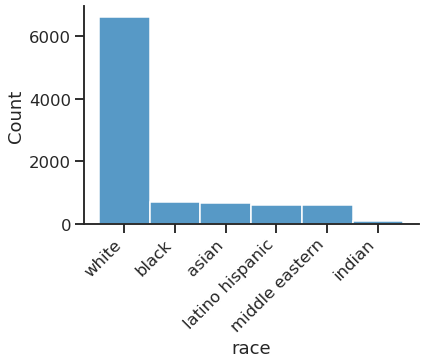

In [109]:
# ethnicity statistics
ax = sns.histplot(stats_df, x='race')
plt.xticks(rotation=45, ha='right')
sns.despine()

In [ ]:
stats_df.to_csv('./data/imdb-wiki/deepface_annotations.csv')

In [42]:
df

,age,filename,gender
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0
...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1
9146,70,304085_1919-07-07_1989.jpg,1
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1


In [118]:
stats_df = stats_df.drop_duplicates(subset=['filename'])

In [119]:
# add to ground truth data
df_annotated = pd.merge(how='outer', left=df, right=stats_df[['gender', 'age', 'filename', 'race', 'weighted_age_deepface']], suffixes=('', '_deepface'), left_on='filename', right_on='filename')
df_annotated = df_annotated.rename(columns={'race': 'race_deepface'})
df_annotated

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb,Woman,29,white,27.542897
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb,Man,20,black,22.001092
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb,Man,21,asian,24.205546
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb,Woman,36,asian,32.919495
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb,Woman,31,white,31.132969
...,...,...,...,...,...,...,...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki,Man,25,asian,27.783502
9146,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki,Man,44,middle eastern,42.484900
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb,Man,43,white,40.944005
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb,Woman,44,white,43.594910


In [120]:
df_annotated.to_csv('./data/imdb-wiki/ground_truth_annotated.csv')

### FairFace

In [3]:
df = pd.read_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index_col=0)
df

,age,filename,gender,name,photo taken,dataset
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb
...,...,...,...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki
9146,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb


In [4]:
df['img_path'] = '../fairpair/data/pairwise_pictures/' + df['filename']
df[['img_path']].to_csv('./data/imdb-wiki/fairface-images.csv', index=False)

## Subsampling

In [2]:
pairwise_df = pd.read_csv('./data/imdb-wiki/comparisons_cleaned.csv')
df = pd.read_csv('./data/imdb-wiki/ground_truth_annotated.csv', index_col=0)
actors_df = pd.read_csv('./data/imdb-wiki/all_actors_from_imdb.csv')

In [56]:
def img_to_imdb(img):
    actor = img.split('_')[0]
    file = img.split('_')[1]
    return f'https://www.imdb.com/name/{actor}/mediaviewer/{file}'

In [3]:
datasets_pairwise = pd.merge(left=pairwise_df, left_on='left', right=df['dataset'], right_index=True).rename(columns={'dataset': 'dataset_left'})
datasets_pairwise = pd.merge(left=datasets_pairwise, left_on='right', right=df['dataset'], right_index=True).rename(columns={'dataset': 'dataset_right'})
datasets_pairwise

,left,right,label,performer,dataset_left,dataset_right
0,2229,3164,3164,0,wiki,imdb
176041,4463,3164,3164,2982,imdb,imdb
116100,8178,3164,8178,2015,wiki,imdb
192535,3579,3164,3164,2395,imdb,imdb
164090,1722,3164,3164,2542,imdb,imdb
...,...,...,...,...,...,...
132808,8382,5689,8382,2201,imdb,imdb
93396,5318,5689,5689,1630,imdb,imdb
79612,3874,5689,3874,910,wiki,imdb
196792,5894,5689,5894,3272,imdb,imdb


In [4]:
df

,age,filename,gender,name,photo taken,dataset,gender_deepface,age_deepface,race_deepface,weighted_age_deepface
0,10,nm1442940_rm3965098752_1996-10-3_2006.jpg,0,Adair Tishler,2006,imdb,Woman,29,white,27.542897
1,10,nm4832920_rm1781768448_2003-8-28_2013.jpg,0,Quvenzhané Wallis,2013,imdb,Man,20,black,22.001092
2,10,nm0652089_rm860657920_1992-3-10_2002.jpg,0,Emily Osment,2002,imdb,Man,21,asian,24.205546
3,10,nm0004917_rm1493730304_1969-5-12_1979.jpg,0,Kim Fields,1979,imdb,Woman,36,asian,32.919495
4,10,nm1113550_rm1332711936_1996-4-14_2006.jpg,0,Abigail Breslin,2006,imdb,Woman,31,white,31.132969
...,...,...,...,...,...,...,...,...,...,...
9145,70,475367_1941-08-03_2011.jpg,1,Robert Thurman,2011,wiki,Man,25,asian,27.783502
9146,70,304085_1919-07-07_1989.jpg,1,William Kunstler,1989,wiki,Man,44,middle eastern,42.484900
9147,70,nm0001627_rm4164078592_1927-2-20_1997.jpg,1,Sidney Poitier,1997,imdb,Man,43,white,40.944005
9148,70,nm0000024_rm1715129344_1904-4-14_1974.jpg,1,John Gielgud,1974,imdb,Woman,44,white,43.594910


In [24]:
pairwise_actors = pairwise_df.copy()
pairwise_actors['left_filename']  = pairwise_actors['left'].apply(lambda x: df[df.index==x].filename.iloc[0])
pairwise_actors['right_filename']  = pairwise_actors['right'].apply(lambda x: df[df.index==x].filename.iloc[0])
pairwise_actors

,left,right,label,performer,left_filename,right_filename
0,2229,3164,3164,0,26147732_1991-07-22_2015.jpg,nm0707728_rm4048061440_1935-1-2_1966.jpg
1,6505,5302,6505,0,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg
2,2822,2139,2822,0,nm0788370_rm2989144320_1971-4-11_1999.jpg,nm0726180_rm2487589632_1981-1-1_2005.jpg
3,2757,8593,8593,1,nm0325390_rm3409478912_1951-10-19_1979.jpg,1094676_1944-12-08_2011.jpg
4,3991,7792,7792,1,1780768_1927-01-22_1963.jpg,nm0000442_rm1571854336_1944-1-23_2005.jpg
...,...,...,...,...,...,...
250244,3209,7,7,3885,nm0000943_rm2478151680_1968-1-13_1999.jpg,nm0000825_rm1298385920_1952-10-7_1962.jpg
250245,8533,7276,8533,3885,26835279_1938-12-27_2004.jpg,nm0771493_rm519611392_1955-5-27_2013.jpg
250246,5025,228,5025,4090,2723_1964-05-27_2007.jpg,nm0858969_rm53517056_1990-1-30_2001.jpg
250247,2059,6425,6425,4090,nm0177396_rm3601370112_1987-9-15_2010.jpg,nm0005391_rm3942707712_1963-3-10_2015.jpg


In [55]:
actors_per_image = actors_df.groupby('filename').count()[['name']].reset_index().rename(columns={'name': 'actors per image'})
single_actor_images = actors_per_image[actors_per_image['actors per image'] == 1]
single_actor_images

,filename,actors per image
1,nm0000002_rm238734336_1924-9-16_1974.jpg,1
2,nm0000002_rm4213815808_1924-9-16_1990.jpg,1
12,nm0000047_rm3937572864_1934-9-20_1998.jpg,1
22,nm0000072_rm2151386624_1932-2-27_1994.jpg,1
23,nm0000072_rm2497944320_1932-2-27_1985.jpg,1
...,...,...
5929,nm5554445_rm1862194688_1999-3-19_2013.jpg,1
5932,nm5617092_rm2985423360_2000-5-16_2015.jpg,1
5934,nm5821197_rm2940008192_1997-6-20_2015.jpg,1
5935,nm5897535_rm4291229440_1999-10-18_2014.jpg,1


In [26]:
pairwise_counted_actors = pd.merge(left=pairwise_actors, left_on='left_filename',
                                   right=actors_per_image.rename(columns={'actors per image': 'actors left'}), right_on='filename')
pairwise_counted_actors = pd.merge(left=pairwise_counted_actors, left_on='right_filename',
                                   right=actors_per_image.rename(columns={'actors per image': 'actors right'}), right_on='filename')
pairwise_counted_actors.drop(columns=['filename_x', 'filename_y'], inplace=True)
pairwise_counted_actors

,left,right,label,performer,left_filename,right_filename,actors left,actors right
0,6505,5302,6505,0,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,1,2
1,6984,5302,5302,1235,nm0001418_rm650675712_1954-5-8_2010.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,2,2
2,926,5302,5302,3600,nm0905157_rm3577780992_1989-3-15_2005.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,2,2
3,1814,5302,5302,66,nm1404408_rm2685713408_1982-2-6_2004.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,2,2
4,4165,5302,5302,1884,nm0000138_rm1663676928_1974-11-11_2011.jpg,nm0025978_rm3962736128_1954-11-16_1999.jpg,3,2
...,...,...,...,...,...,...,...,...
105426,7648,8207,7648,3554,nm0000217_rm2711067392_1942-11-17_2002.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,1,2
105427,3519,8207,3519,1930,nm0000656_rm3759181312_1958-8-18_1991.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,2,2
105428,6972,8207,8207,285,nm0827565_rm1589166592_1953-7-11_2009.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,2,2
105429,809,8207,8207,633,nm0153738_rm2576259840_1990-7-24_2005.jpg,nm0000606_rm2364001280_1948-7-30_2012.jpg,1,2


In [27]:
pairwise_single_actor = pairwise_counted_actors[(pairwise_counted_actors['actors left'] == 1) & (pairwise_counted_actors['actors right'] == 1)]
pairwise_single_actor

,left,right,label,performer,left_filename,right_filename,actors left,actors right
14,6505,3785,6505,82,nm0000072_rm2497944320_1932-2-27_1985.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
16,482,3785,3785,705,nm1351987_rm855546624_1993-8-11_2006.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
17,6340,3785,6340,1498,nm0000968_rm2616825856_1950-6-8_2002.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
18,2612,3785,3785,3874,nm0174819_rm2326903040_1978-6-9_2005.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
20,834,3785,3785,1998,nm0004850_rm856395264_1974-9-29_1989.jpg,nm0214299_rm48479232_1976-10-23_2011.jpg,1,1
...,...,...,...,...,...,...,...,...
105411,4734,1133,4734,3321,nm0396908_rm1386384896_1968-7-19_2009.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1
105412,9013,1133,9013,1697,nm0000603_rm3813120512_1937-1-30_2007.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1
105414,8105,1133,8105,1008,nm0877913_rm4197488640_1939-11-26_2003.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1
105420,840,1133,840,1347,nm0088298_rm4217346048_1989-2-21_2004.jpg,nm1091701_rm587111168_1990-6-15_2007.jpg,1,1


In [63]:
img_to_imdb('nm0000072_rm2497944320_1932-2-27_1985.jpg')

'https://www.imdb.com/name/nm0000072/mediaviewer/rm2497944320'

In [29]:
print('pairwise single actor comparisons:', len(pairwise_single_actor))
print('wiki only comparisons:', len(datasets_pairwise[(datasets_pairwise.dataset_left == 'wiki') & (datasets_pairwise.dataset_right == 'wiki')]))
print('imdb only comparisons:', len(datasets_pairwise[(datasets_pairwise.dataset_left == 'imdb') & (datasets_pairwise.dataset_right == 'imdb')]))
print('between datasets comparisons:', len(datasets_pairwise[datasets_pairwise.dataset_left != datasets_pairwise.dataset_right]))

pairwise single actor comparisons: 25184
wiki only comparisons: 30738
imdb only comparisons: 106207
between datasets comparisons: 113304


In [32]:
wiki_only_pairwise = datasets_pairwise[(datasets_pairwise.dataset_left == 'wiki') & (datasets_pairwise.dataset_right == 'wiki')]
wiki_only_pairwise

,left,right,label,performer,dataset_left,dataset_right
16344,2229,2085,2085,321,wiki,wiki
231914,5595,2085,5595,3570,wiki,wiki
106760,3240,2085,2085,1634,wiki,wiki
97883,2784,2085,2784,1707,wiki,wiki
2522,1172,2085,1172,88,wiki,wiki
...,...,...,...,...,...,...
168115,1486,6196,6196,1728,wiki,wiki
72576,1499,6196,6196,1008,wiki,wiki
238163,2482,1339,2482,3524,wiki,wiki
209064,2755,1339,2755,3535,wiki,wiki


### Basic Statistics

In [30]:
counts_left = pairwise_df.groupby(['left'], sort=True).count().reset_index().rename(columns={'left':'id', 'right':'count_left'})[['id','count_left']]
counts_right = pairwise_df.groupby(['right'], sort=True).count().reset_index().rename(columns={'right':'id', 'left':'count_right'})[['id','count_right']]
counts = pd.merge(left=counts_left, right=counts_right, on='id')
counts['total comparisons'] = counts['count_left'] + counts['count_right']
stats = pd.merge(left=counts, right=df[['age','gender', 'race_deepface']], left_on='id', right_index=True)
stats

,id,count_left,count_right,total comparisons,age,gender,race_deepface
0,0,27,24,51,10,0,white
1,1,38,26,64,10,0,black
2,2,30,21,51,10,0,asian
3,3,33,21,54,10,0,asian
4,4,25,25,50,10,0,white
...,...,...,...,...,...,...,...
9145,9145,21,27,48,70,1,asian
9146,9146,19,35,54,70,1,middle eastern
9147,9147,32,37,69,70,1,white
9148,9148,27,19,46,70,1,white


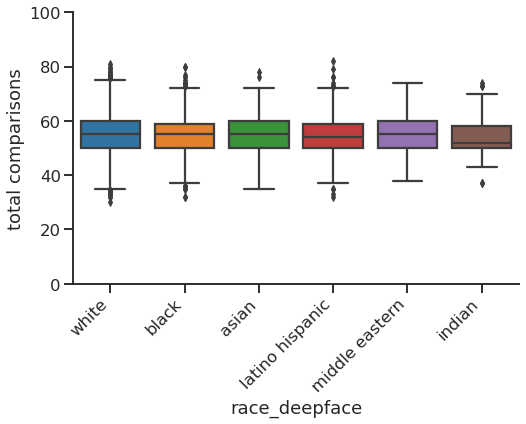

In [123]:
#print(f"individuals of gender 0: {len(stats[stats.gender == 0])}")
#print(f"individuals of gender 1: {len(stats[stats.gender == 1])}")
#print(f"mean # comparisons, gender 0: {stats[stats.gender == 0]['total comparisons'].mean()}")
#print(f"mean # comparisons, gender 1: {stats[stats.gender == 1]['total comparisons'].mean()}")

ax = sns.catplot(stats, y='total comparisons', x='race_deepface', kind='box', aspect=1.5/1)
ax.set(ylim=(0,100))
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
win_lose = pairwise_df[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose.loc[win_lose.left == win_lose.win, 'lose'] = win_lose.right
win_lose.loc[win_lose.right == win_lose.win, 'lose'] = win_lose.left
win_lose['lose'] = win_lose['lose'].astype(int)
win_lose

,left,right,win,lose
0,2229,3164,3164,2229
1,6505,5302,6505,5302
2,2822,2139,2822,2139
3,2757,8593,8593,2757
4,3991,7792,7792,3991
...,...,...,...,...
250244,3209,7,7,3209
250245,8533,7276,8533,7276
250246,5025,228,5025,228
250247,2059,6425,6425,2059


In [33]:
win_lose_wiki = wiki_only_pairwise[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose_wiki.loc[win_lose_wiki.left == win_lose_wiki.win, 'lose'] = win_lose_wiki.right
win_lose_wiki.loc[win_lose_wiki.right == win_lose_wiki.win, 'lose'] = win_lose_wiki.left
win_lose_wiki['lose'] = win_lose_wiki['lose'].astype(int)
win_lose_wiki

,left,right,win,lose
16344,2229,2085,2085,2229
231914,5595,2085,5595,2085
106760,3240,2085,2085,3240
97883,2784,2085,2784,2085
2522,1172,2085,1172,2085
...,...,...,...,...
168115,1486,6196,6196,1486
72576,1499,6196,6196,1499
238163,2482,1339,2482,1339
209064,2755,1339,2755,1339


In [34]:
win_lose_single = pairwise_single_actor[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose_single.loc[win_lose_single.left == win_lose_single.win, 'lose'] = win_lose_single.right
win_lose_single.loc[win_lose_single.right == win_lose_single.win, 'lose'] = win_lose_single.left
win_lose_single['lose'] = win_lose_single['lose'].astype(int)
win_lose_single

,left,right,win,lose
14,6505,3785,6505,3785
16,482,3785,3785,482
17,6340,3785,6340,3785
18,2612,3785,3785,2612
20,834,3785,3785,834
...,...,...,...,...
105411,4734,1133,4734,1133
105412,9013,1133,9013,1133
105414,8105,1133,8105,1133
105420,840,1133,840,1133


In [72]:
counts_win = win_lose.groupby(['win'], sort=True).count().reset_index().rename(columns={'win':'id', 'lose':'number of wins'})[['id','number of wins']]
counts_lose = win_lose.groupby(['lose'], sort=True).count().reset_index().rename(columns={'lose':'id', 'win':'number of losses'})[['id','number of losses']]
counts_win_lose = pd.merge(left=counts_win, right=counts_lose, on='id')
#counts['total comparisons'] = counts['count_left'] + counts['count_right']
stats_win_lose = pd.merge(left=counts_win_lose, right=df[['age','gender', 'race_deepface', 'gender_deepface', 'age_deepface', 'weighted_age_deepface', 'dataset']], left_on='id', right_index=True)
stats_win_lose['gender'] = stats_win_lose['gender'].replace({0: 'female', 1: 'male'})
stats_win_lose['winning ratio'] = stats_win_lose['number of wins'] / (stats_win_lose['number of wins'] + stats_win_lose['number of losses'])
stats_win_lose

,id,number of wins,number of losses,age,gender,race_deepface,gender_deepface,age_deepface,weighted_age_deepface,dataset,winning ratio
0,0,1,50,10,female,white,Woman,29,27.542897,imdb,0.019608
1,1,5,59,10,female,black,Man,20,22.001092,imdb,0.078125
2,2,2,49,10,female,asian,Man,21,24.205546,imdb,0.039216
3,3,3,51,10,female,asian,Woman,36,32.919495,imdb,0.055556
4,4,22,28,10,female,white,Woman,31,31.132969,imdb,0.440000
...,...,...,...,...,...,...,...,...,...,...,...
9094,9144,4,50,70,male,white,Woman,21,22.735845,imdb,0.074074
9095,9145,18,30,70,male,asian,Man,25,27.783502,wiki,0.375000
9096,9147,53,16,70,male,white,Man,43,40.944005,imdb,0.768116
9097,9148,33,13,70,male,white,Woman,44,43.594910,imdb,0.717391


In [71]:
wiki_counts_win = win_lose_wiki.groupby(['win'], sort=True).count().reset_index().rename(columns={'win':'id', 'lose':'number of wins'})[['id','number of wins']]
wiki_counts_lose = win_lose_wiki.groupby(['lose'], sort=True).count().reset_index().rename(columns={'lose':'id', 'win':'number of losses'})[['id','number of losses']]
wiki_counts_win_lose = pd.merge(left=wiki_counts_win, right=wiki_counts_lose, on='id')
#counts['total comparisons'] = counts['count_left'] + counts['count_right']
wiki_stats_win_lose = pd.merge(left=wiki_counts_win_lose, right=df[['age','gender', 'race_deepface', 'gender_deepface', 'age_deepface', 'weighted_age_deepface', 'dataset']], left_on='id', right_index=True)
wiki_stats_win_lose['gender'] = wiki_stats_win_lose['gender'].replace({0: 'female', 1: 'male'})
wiki_stats_win_lose['winning ratio'] = wiki_stats_win_lose['number of wins'] / (wiki_stats_win_lose['number of wins'] + wiki_stats_win_lose['number of losses'])
wiki_stats_win_lose

,id,number of wins,number of losses,age,gender,race_deepface,gender_deepface,age_deepface,weighted_age_deepface,dataset,winning ratio
0,18,3,15,10,female,white,Woman,21,22.005691,wiki,0.166667
1,38,1,23,10,female,white,Woman,39,39.679077,wiki,0.041667
2,60,1,17,10,female,asian,Man,19,18.892545,wiki,0.055556
3,72,2,20,10,female,middle eastern,Woman,34,35.143034,wiki,0.090909
4,153,1,16,11,female,white,Woman,31,31.803054,wiki,0.058824
...,...,...,...,...,...,...,...,...,...,...,...
3048,9135,14,2,70,male,white,Man,33,31.723206,wiki,0.875000
3049,9136,8,7,70,male,latino hispanic,Man,47,47.326672,wiki,0.533333
3050,9137,13,1,70,male,white,Man,28,36.954466,wiki,0.928571
3051,9139,17,4,70,male,white,Man,68,66.873028,wiki,0.809524


In [68]:
single_counts_win = win_lose_single.groupby(['win'], sort=True).count().reset_index().rename(columns={'win':'id', 'lose':'number of wins'})[['id','number of wins']]
single_counts_lose = win_lose_single.groupby(['lose'], sort=True).count().reset_index().rename(columns={'lose':'id', 'win':'number of losses'})[['id','number of losses']]
single_counts_win_lose = pd.merge(left=single_counts_win, right=single_counts_lose, on='id')
#counts['total comparisons'] = counts['count_left'] + counts['count_right']
single_stats_win_lose = pd.merge(left=single_counts_win_lose, right=df[['age','gender', 'race_deepface', 'gender_deepface', 'age_deepface', 'weighted_age_deepface', 'dataset']], left_on='id', right_index=True)
single_stats_win_lose['gender'] = single_stats_win_lose['gender'].replace({0: 'female', 1: 'male'})
single_stats_win_lose['winning ratio'] = single_stats_win_lose['number of wins'] / (single_stats_win_lose['number of wins'] + single_stats_win_lose['number of losses'])
single_stats_win_lose

,id,number of wins,number of losses,age,gender,race_deepface,gender_deepface,age_deepface,weighted_age_deepface,dataset,winning ratio
0,0,1,14,10,female,white,Woman,29,27.542897,imdb,0.066667
1,1,2,10,10,female,black,Man,20,22.001092,imdb,0.166667
2,8,5,20,10,female,white,Woman,24,25.323256,imdb,0.200000
3,14,5,4,10,female,white,Woman,31,33.338560,imdb,0.555556
4,16,7,11,10,female,latino hispanic,Woman,36,32.759094,imdb,0.388889
...,...,...,...,...,...,...,...,...,...,...,...
2730,9113,11,8,70,male,white,Woman,31,32.816443,imdb,0.578947
2731,9114,4,1,70,male,white,Man,44,45.632677,imdb,0.800000
2732,9120,16,2,70,male,white,Man,38,39.473087,imdb,0.888889
2733,9126,15,3,70,male,white,Man,52,53.106462,imdb,0.833333


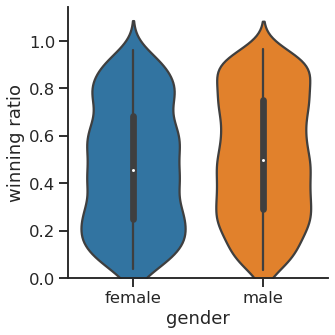

In [112]:
sns.set_context("talk") # larger font size
sns.set_style('ticks')


ax = sns.catplot(wiki_stats_win_lose, y='winning ratio', x='gender', kind='violin', aspect=1/1)
ax.set(ylim=(0,None))
#plt.xticks(rotation=45, ha='right')
plt.show()

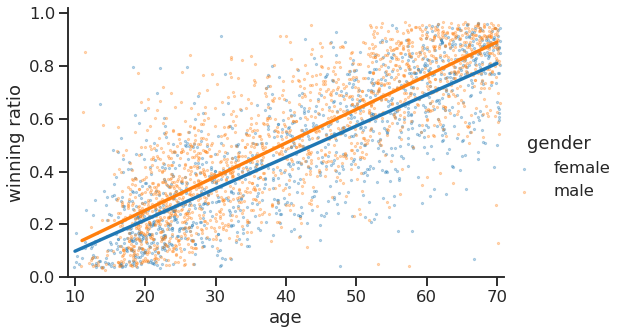

In [108]:
sns.set_context("talk")

ax = sns.lmplot(wiki_stats_win_lose, x='age', y='winning ratio', hue='gender',
                aspect=1.5/1, ci=None, scatter_kws={"s": 5, 'alpha': 0.3}, x_jitter=0.5, y_jitter=0.01)
ax.set(xlim=(9,71), ylim=(0,1.02))

In [73]:
# Correlations
from scipy.stats import pearsonr

print('full dataset', pearsonr(stats_win_lose.age, stats_win_lose['winning ratio']))
print('full dataset, detected age', pearsonr(stats_win_lose.weighted_age_deepface, stats_win_lose['winning ratio']))
print('wiki dataset only', pearsonr(wiki_stats_win_lose.age, wiki_stats_win_lose['winning ratio']))
print('single actors imdb', pearsonr(single_stats_win_lose.age, single_stats_win_lose['winning ratio']))

full dataset (0.7331183776762634, 0.0)
full dataset, detected age (0.6218352614398862, 0.0)
wiki dataset only (0.8063553896332908, 0.0)
single actors imdb (0.78615246952176, 0.0)


In [47]:
from statsmodels.formula.api import ols

x = single_stats_win_lose['age']
y = single_stats_win_lose['number of wins']
regression = ols("data ~ x", data=dict(data=y, x=x)).fit()
test = regression.outlier_test()

In [48]:
test

,student_resid,unadj_p,bonf(p)
0,-0.387114,0.698702,1.0
1,-0.109492,0.912821,1.0
2,0.723413,0.469488,1.0
3,0.723413,0.469488,1.0
4,1.278950,0.201023,1.0
...,...,...,...
2730,-1.200495,0.230051,1.0
2731,-3.149277,0.001654,1.0
2732,0.187964,0.850919,1.0
2733,-0.089666,0.928559,1.0


In [50]:
outliers = test[test['unadj_p'] < 0.01].index
outliers

Int64Index([  98,  123,  273,  441,  543,  807,  849, 1021, 1085, 1145, 1197,
            1258, 1310, 1430, 1496, 1539, 1657, 1664, 1691, 1699, 1778, 1821,
            1854, 1869, 1980, 2005, 2046, 2066, 2077, 2079, 2142, 2195, 2282,
            2341, 2408, 2415, 2416, 2417, 2421, 2455, 2459, 2479, 2559, 2585,
            2590, 2602, 2622, 2665, 2689, 2699, 2724, 2726, 2731],
           dtype='int64')

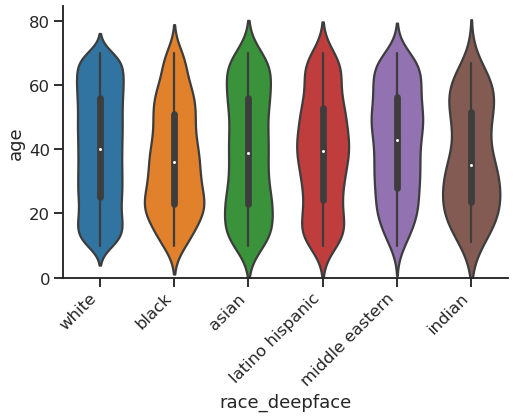

In [10]:
ax = sns.catplot(df, y='age', x='race_deepface', kind='violin', aspect=1.5/1)
ax.set(ylim=(0,None))
plt.xticks(rotation=45, ha='right')
plt.show()

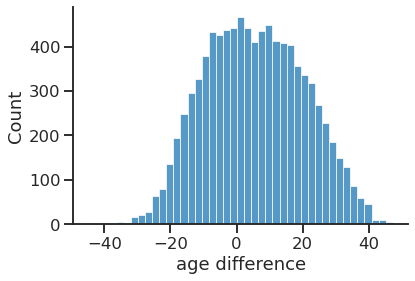

In [246]:
df['age difference'] = df.age - df.weighted_age_deepface
sns.histplot(df, x='age difference')
sns.despine()

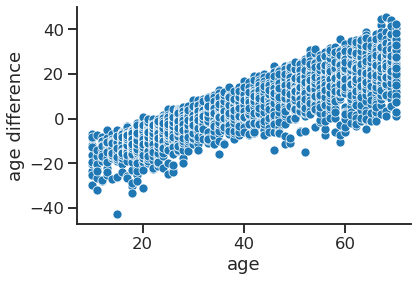

In [145]:
sns.scatterplot(df[df.dataset == 'wiki'], y='age difference', x='age')
sns.despine()

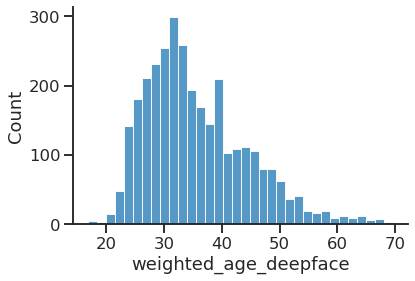

In [141]:
sns.histplot(df[df.dataset == 'wiki'], x='weighted_age_deepface')
sns.despine()

In [67]:
win_lose_perf = pairwise_df.copy().rename(columns={'label': 'win'})
win_lose_perf.loc[win_lose_perf.left == win_lose_perf.win, 'lose'] = win_lose_perf.right
win_lose_perf.loc[win_lose_perf.right == win_lose_perf.win, 'lose'] = win_lose_perf.left
win_lose_perf['lose'] = win_lose_perf['lose'].astype(int)
win_lose_perf

,left,right,win,performer,lose
0,2229,3164,3164,0,2229
1,6505,5302,6505,0,5302
2,2822,2139,2822,0,2139
3,2757,8593,8593,1,2757
4,3991,7792,7792,1,3991
...,...,...,...,...,...
250244,3209,7,7,3885,3209
250245,8533,7276,8533,3885,7276
250246,5025,228,5025,4090,228
250247,2059,6425,6425,4090,2059


## Create a DiGraph to Subsample from

In [ ]:
import networkx as nx

pairwise_df = pd.read_csv('./data/imdb-wiki/comparisons_cleaned.csv')
df = pd.read_csv('./data/imdb-wiki/ground_truth_cleaned.csv', index_col=0)

win_lose = pairwise_df[['left', 'right', 'label']].copy().rename(columns={'label': 'win'})
win_lose.loc[win_lose.left == win_lose.win, 'lose'] = win_lose.right
win_lose.loc[win_lose.right == win_lose.win, 'lose'] = win_lose.left
win_lose['lose'] = win_lose['lose'].astype(int)

G = nx.from_pandas_edgelist(win_lose, source='lose', target='win', create_using=nx.DiGraph)
G

In [ ]:
len(list(nx.strongly_connected_components(G)))  # the full dataset has one giant component and some isolates (strong connectivity)

54

In [ ]:
tmp_df = df[['age', 'gender']].rename(columns={'age': 'skill'})
tmp_df['minority'] = abs(tmp_df['gender'] - 1)

nx.set_node_attributes(G, tmp_df[['skill', 'minority']].to_dict(orient='index'))

In [ ]:
G.nodes(data='skill')

NodeDataView({2229: 24, 3164: 31, 5302: 45, 6505: 53, 2139: 24, 2822: 28, 2757: 28, 8593: 67, 3991: 36, 7792: 61, 1674: 21, 8303: 65, 4317: 38, 5667: 47, 5657: 47, 6377: 52, 6040: 50, 4541: 40, 5192: 44, 8903: 69, 1299: 18, 5052: 43, 2769: 28, 8858: 69, 3702: 34, 2530: 26, 3295: 31, 2124: 24, 1197: 17, 4616: 40, 1207: 18, 8514: 66, 2238: 24, 6509: 53, 2005: 23, 2919: 29, 1161: 17, 3934: 36, 558: 13, 1886: 22, 5914: 49, 1909: 22, 3595: 33, 4970: 43, 2322: 25, 9095: 70, 34: 10, 7004: 56, 4313: 38, 6044: 50, 5647: 47, 3469: 33, 8639: 67, 3996: 36, 6939: 56, 6698: 54, 7049: 56, 2100: 24, 7426: 59, 313: 12, 4378: 39, 565: 13, 6650: 54, 2716: 28, 3025: 30, 278: 11, 8867: 69, 282: 11, 2580: 27, 477: 13, 6580: 53, 1851: 22, 8733: 68, 6695: 54, 7075: 57, 1226: 18, 5294: 45, 7495: 59, 6023: 50, 3662: 34, 614: 14, 3327: 32, 7248: 58, 4059: 37, 5829: 48, 2276: 25, 4076: 37, 5707: 48, 5286: 45, 3179: 31, 5715: 48, 5950: 49, 8258: 65, 5945: 49, 2469: 26, 2918: 29, 3975: 36, 1514: 20, 1506: 20, 2482:

## Testing the Subsampling

In [ ]:
random_nodes = df.sample(int(len(df)*0.2), random_state=42)['gender'].index
print(f'selected {len(random_nodes)} nodes')
H = G.subgraph(random_nodes)
nx.is_weakly_connected(H)

selected 1830 nodes


True

In [ ]:
random_nodes_0 = df[df.gender == 0].sample(int(len(df)*0.2*0.75), random_state=42)['gender'].index
random_nodes_1 = df[df.gender == 1].sample(int(len(df)*0.2*0.25), random_state=42)['gender'].index
print(f'selected {len(random_nodes_0)} nodes of gender 0')
print(f'selected {len(random_nodes_1)} nodes of gender 1')
H = G.subgraph(list(random_nodes_0) + list(random_nodes_1))
nx.is_weakly_connected(H)

selected 1372 nodes of gender 0
selected 457 nodes of gender 1


True

In [ ]:
rng = np.random.default_rng(seed=42)
random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)  # crucially, we ignore edges that have already been re-added (i.e., we don't exclude them from the sample)

In [ ]:
I = nx.DiGraph()
I.add_nodes_from(G.nodes(data=True))

In [ ]:
I.add_edges_from(list(map(tuple, random_edges)))
nx.is_weakly_connected(I)

False

## Subsample and Recover a Ranking

In [ ]:
from fairpair import *

In [ ]:
FPG = FairPairGraph()
FPG.add_nodes_from(G.nodes(data=True))

### Random Subsampling

In [ ]:
# weak connectivity

rng = np.random.default_rng()
FPG_test = FPG.copy()

for i in range(100):
    # sample 10 times before evaluating again
    for j in range(10):
        random_nodes = df.sample(int(len(df)*0.2))['gender'].index
        H = G.subgraph(random_nodes)
        random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)
        FPG_test.add_edges_from(list(map(tuple, random_edges)))
    print(f"iteration {(i+1)*(j+1)}: {'not ' if not nx.is_weakly_connected(FPG_test) else ''}weakly connected")
    if nx.is_weakly_connected(FPG_test): break

iteration 10: not weakly connected
iteration 20: not weakly connected
iteration 30: not weakly connected
iteration 40: not weakly connected
iteration 50: not weakly connected
iteration 60: not weakly connected
iteration 70: not weakly connected
iteration 80: weakly connected


In [ ]:
# testing the random subsampling on a single run

rng = np.random.default_rng()
FPG_rand = FPG.copy()
connected = False
results = []
ranker = RankRecovery(FPG_rand)
trial = 0

base_scores = {node: score for node, score in FPG.nodes(data='skill')}
minority_nodes = list(FPG_rand.minority.nodes)
majority_nodes = list(FPG_rand.majority.nodes)

for i in range(100):
    # sample 10 times before evaluating again
    for j in range(10):
        random_nodes = df.sample(int(len(df)*0.2))['gender'].index
        H = G.subgraph(random_nodes)
        random_edges = rng.choice(H.edges, size=len(H)//2, axis=0)
        FPG_rand.add_edges_from(list(map(tuple, random_edges)))
    
    ranking, other_nodes = ranker.apply()
    
    if nx.is_weakly_connected(FPG_rand):
        if not connected:
            print(f'Weakly connected after {(i+1)*10} iterations.')
            connected = True
        tau = weighted_tau_nodes(base_scores, ranking, subgraph_nodes=majority_nodes, complementary_nodes=minority_nodes)
        results.append((trial, i*10, tau, 'tau', 'Privileged'))
        tau = weighted_tau_nodes(base_scores, ranking, subgraph_nodes=minority_nodes, complementary_nodes=majority_nodes)
        results.append((trial, i*10, tau, 'tau', 'Unprivileged'))
        exp = exposure_nodes(ranking, subgraph_nodes=majority_nodes)
        results.append((trial, i*10, exp, 'exposure', 'Privileged'))
        exp = exposure_nodes(ranking, subgraph_nodes=minority_nodes)
        results.append((trial, i*10, exp, 'exposure', 'Unprivileged'))
        #tau = weighted_tau_separate(FPG_rand, ranking, FPG_rand.majority)
        #accuracy.append((trial, i*10, tau[0], 'Privileged within-group'))
        #accuracy.append((trial, i*10, tau[1], 'Between groups'))
        #tau = weighted_tau_separate(FPG_rand, ranking, FPG_rand.minority, calc_between=False)
        #accuracy.append((trial, i*10, tau[0], 'Unprivileged within-group'))
        
        print(f'Evaluated {(i+1)*10} iterations.')

In [ ]:
results_df = pd.DataFrame(results, columns=['trial', 'iteration', 'value', 'metric', 'group'])
results_df

,trial,iteration,value,metric,group
0,0,70,0.350575,tau,Privileged
1,0,70,0.351035,tau,Unprivileged
2,0,70,0.088686,exposure,Privileged
3,0,70,0.086052,exposure,Unprivileged
4,0,80,0.345785,tau,Privileged
...,...,...,...,...,...
167,0,480,0.085792,exposure,Unprivileged
168,0,490,0.316683,tau,Privileged
169,0,490,0.316317,tau,Unprivileged
170,0,490,0.088932,exposure,Privileged


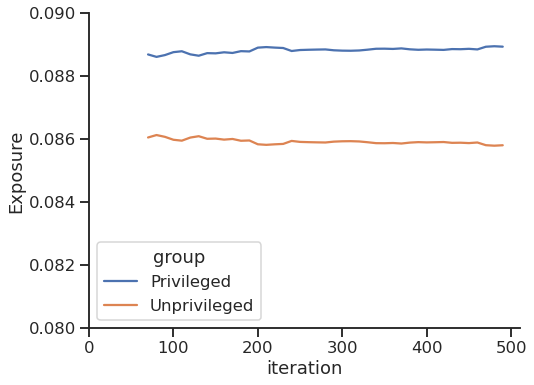

In [ ]:
sns.set(rc={'figure.figsize':(4/3*5.8,5.8)})
sns.set_context("talk") # larger font size
sns.set_style('ticks')

tmp_df = results_df[results_df.metric == 'exposure'].copy()
tmp_df['Exposure'] = tmp_df['value']
ax = sns.lineplot(tmp_df, x='iteration', y='Exposure', hue='group', hue_order=['Privileged', 'Unprivileged'])
ax.set(ylim=(0.08,0.09), xlim=(0,None))
sns.despine()

In [ ]:
print('Orginal graph:', G.number_of_edges(), 'edges')
print('Subsampled graph after 500 iterations:', FPG_rand.number_of_edges(), 'edges')
print('ratio:', FPG_rand.number_of_edges()/G.number_of_edges()*100, '%')

Orginal graph: 250249 edges
Subsampled graph after 500 iterations: 208628 edges
ratio: 83.36816530735388 %
